In [103]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from grid_env import GridEnv, generate_grid_environment
from mdp import MDP
from utils import *
from tqdm.notebook import tqdm_notebook

In [29]:
grid = GridEnv(matrix=[[2, 2, 2, 2, 2, 2, 2, 2],
                       [2, 0, 0, 0, 1, 0, 0, 2],
                       [2, 0, 0, 1, 0, 0, 0, 2],
                       [2, 0, 0, 0, 1, 0, 0, 2],
                       [2, 0, 0, 0, 0, 0, 0, 2],
                       [2, 0, 0, 0, 0, 0, 0, 2],
                       [2, 0, 0, 0, 0, 0, 3, 2],
                       [2, 2, 2, 2, 2, 2, 2, 2]])
gridworld_mdp = MDP(grid)

# Convergence Analysis

## ($\gamma$, $\theta$) vs. Iterations Until Convergence

In [30]:
gammas=np.arange(0.1, 1.1, 0.1)
thetas=np.reshape([[5*pow(10, -i), pow(10, -i)] for i in range(1, 6)], -1)

In [31]:
vi_iterations, vi_runtimes = gamma_theta_convergence(gridworld_mdp, mode="value", gammas=gammas, thetas=thetas)

In [32]:
pi_iterations, pi_runtimes = gamma_theta_convergence(gridworld_mdp, mode="policy", gammas=gammas, thetas=thetas)

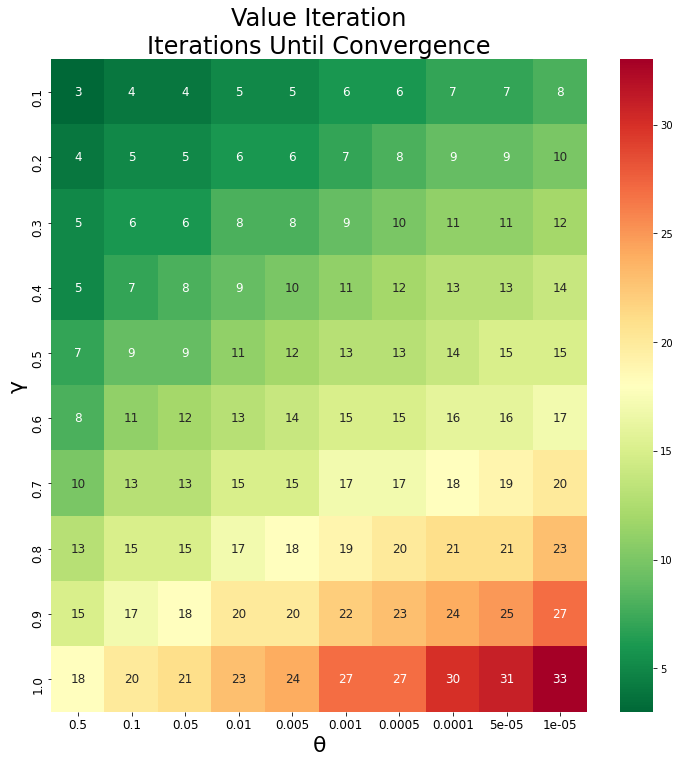

In [33]:
plot_heatmap(vi_iterations, "Value Iteration\nIterations Until Convergence",xticklabels=thetas, yticklabels=gammas.round(2), reverse_cmap=True)

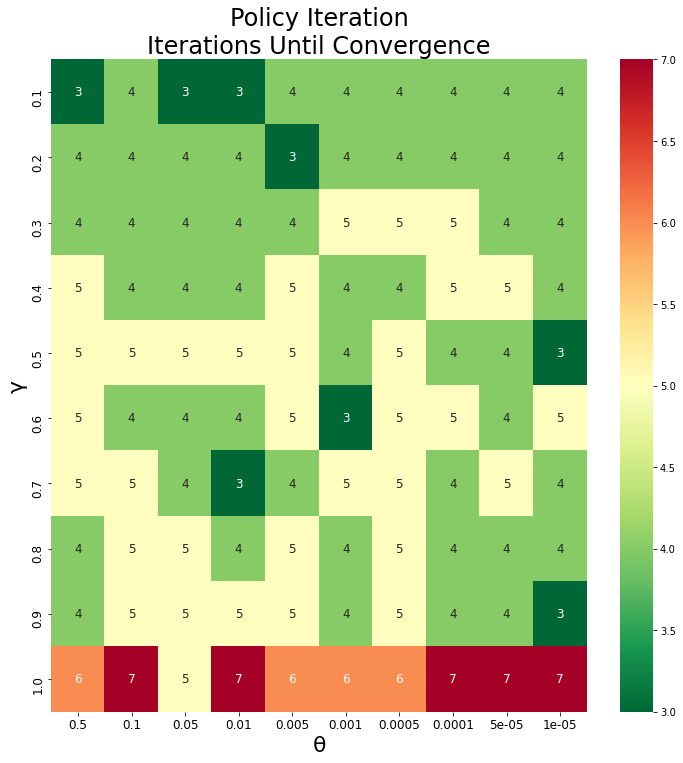

In [34]:
plot_heatmap(pi_iterations, "Policy Iteration\nIterations Until Convergence", xticklabels=thetas, yticklabels=gammas.round(2), reverse_cmap=True)

## ($\gamma$, $\theta$) vs. Runtime Until Convergence

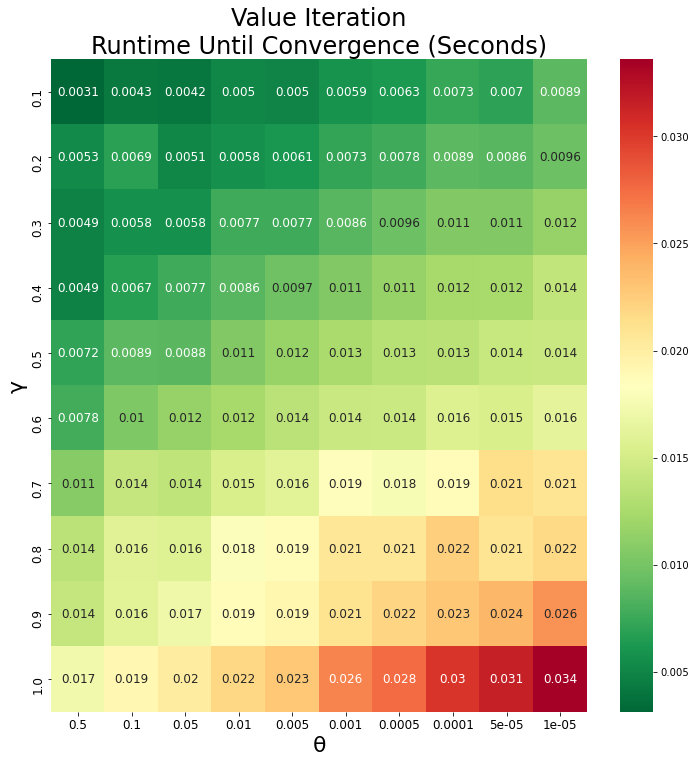

In [35]:
plot_heatmap(vi_runtimes, "Value Iteration\nRuntime Until Convergence (Seconds)", xticklabels=thetas, yticklabels=gammas.round(2), reverse_cmap=True)

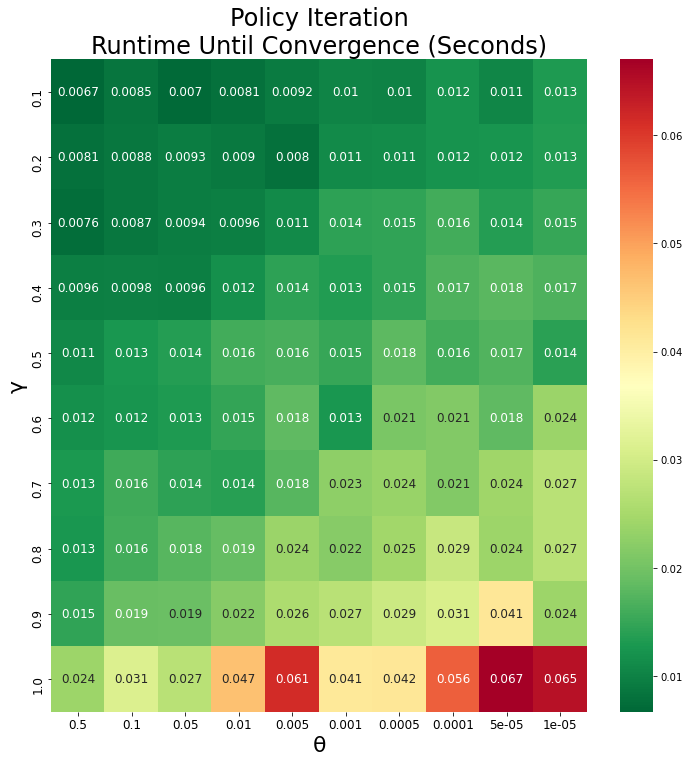

In [36]:
plot_heatmap(pi_runtimes, "Policy Iteration\nRuntime Until Convergence (Seconds)", xticklabels=thetas, yticklabels=gammas.round(2), reverse_cmap=True)

## $\Delta$ vs. Iteration

In [123]:
theta=1e-5
gamma = 1
max_iter=1000

In [124]:
iteration, vi_optimal_pi, vi_deltas, vi_optimal_v = gridworld_mdp.value_iteration(theta=theta, gamma=gamma, max_iter=max_iter)
print(f"Converged in {iteration} iterations")

Converged in 33 iterations


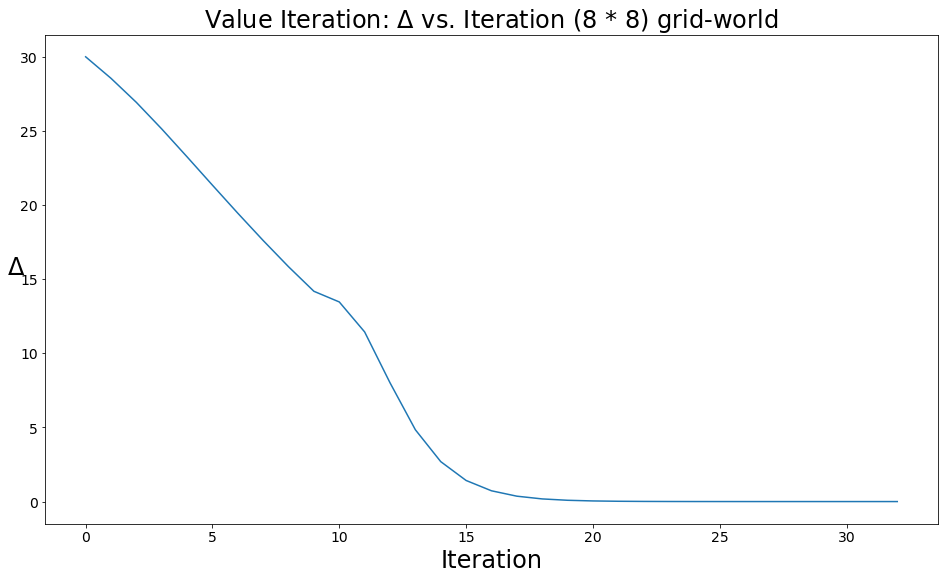

In [118]:
plt.figure(figsize=(16, 9))
plt.plot(vi_deltas)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Iteration", fontsize=24)
plt.ylabel("$\Delta$", fontsize=24, rotation=0);
plt.title("Value Iteration: $\Delta$ vs. Iteration (8 * 8) grid-world", fontsize=24);

In [125]:
iteration, pi_optimal_pi, pi_deltas, pi_optimal_v = gridworld_mdp.policy_iteration(theta=theta, gamma=gamma, max_iter=max_iter)
print(f"Converged in {iteration} iterations")

Converged in 7 iterations


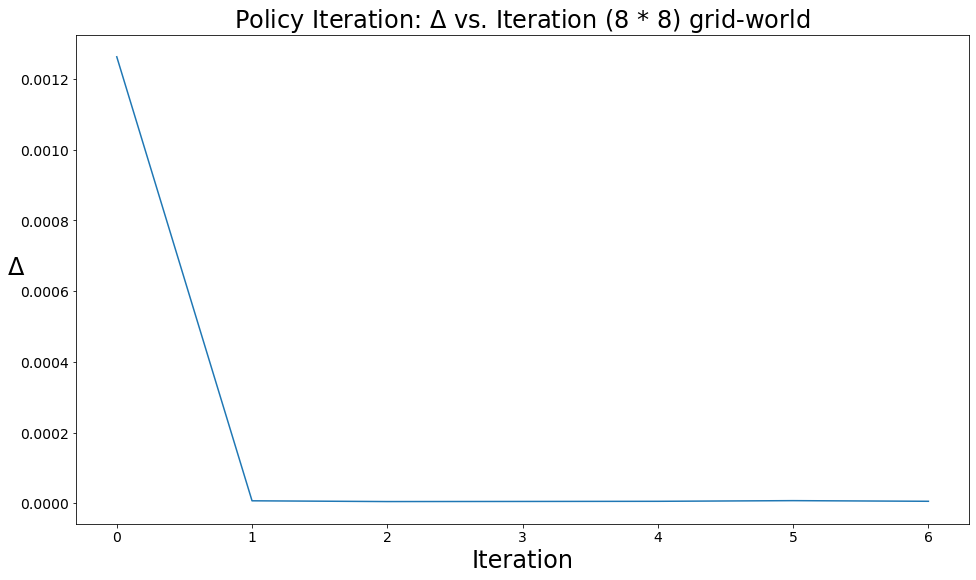

In [132]:
plt.figure(figsize=(16, 9))
plt.plot(pi_deltas)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Iteration", fontsize=24)
plt.ylabel("$\Delta$", fontsize=24, rotation=0);
plt.title("Policy Iteration: $\Delta$ vs. Iteration (8 * 8) grid-world", fontsize=24);

In [120]:
grid2 = generate_grid_environment(shape=(100, 100), traps_rate=0.1, treasure_position=None)

In [127]:
grid2=GridEnv(grid2)

In [128]:
gridworld2_mdp = MDP(grid2)

In [129]:
iteration, vi_optimal_pi, vi_deltas, vi_optimal_v = gridworld2_mdp.value_iteration(theta=theta, gamma=gamma, max_iter=max_iter)
print(f"Converged in {iteration} iterations")

Converged in 148 iterations


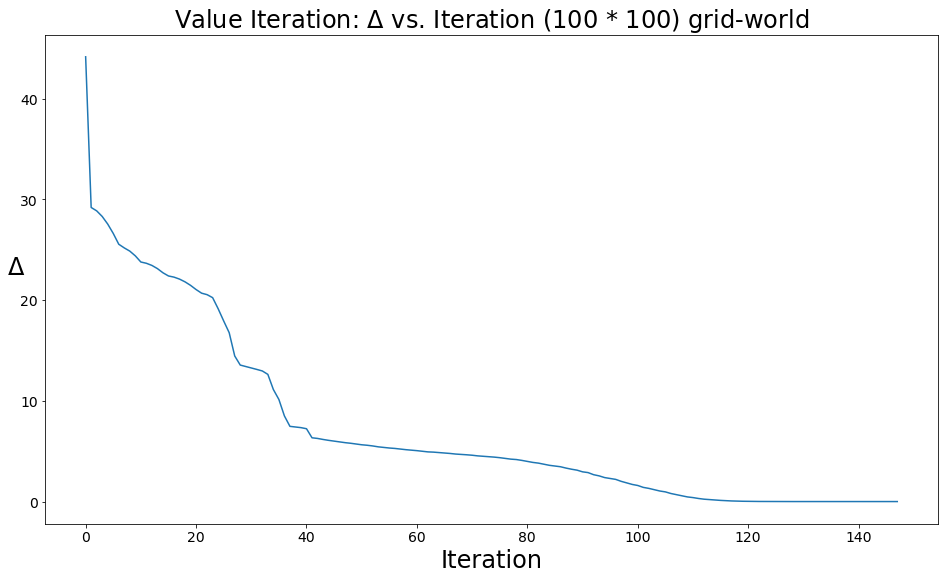

In [131]:
plt.figure(figsize=(16, 9))
plt.plot(vi_deltas)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Iteration", fontsize=24)
plt.ylabel("$\Delta$", fontsize=24, rotation=0);
plt.title("Value Iteration: $\Delta$ vs. Iteration (100 * 100) grid-world", fontsize=24);

In [133]:
iteration, pi_optimal_pi, pi_deltas, pi_optimal_v = gridworld2_mdp.policy_iteration(theta=theta, gamma=gamma, max_iter=max_iter)
print(f"Converged in {iteration} iterations")

Converged in 44 iterations


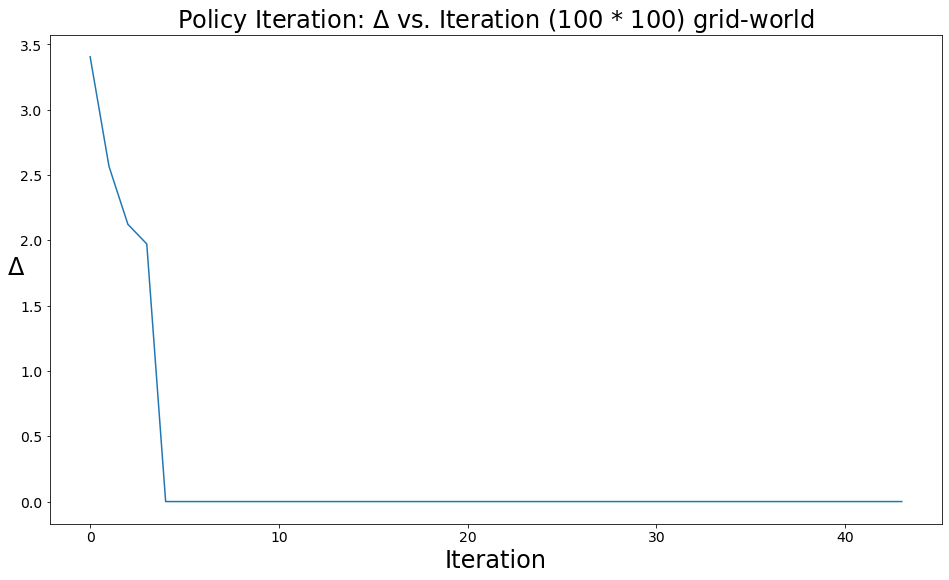

In [136]:
plt.figure(figsize=(16, 9))
plt.plot(pi_deltas)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Iteration", fontsize=24)
plt.ylabel("$\Delta$", fontsize=24, rotation=0);
plt.title("Policy Iteration: $\Delta$ vs. Iteration (100 * 100) grid-world", fontsize=24);

## Q-learning Score vs Episode

In [20]:
q_optimal_pi, scores, q_optimal_v = gridworld_mdp.q_learning(gamma=1, num_episodes=10000)

In [21]:
def moving_average(a, n=10) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

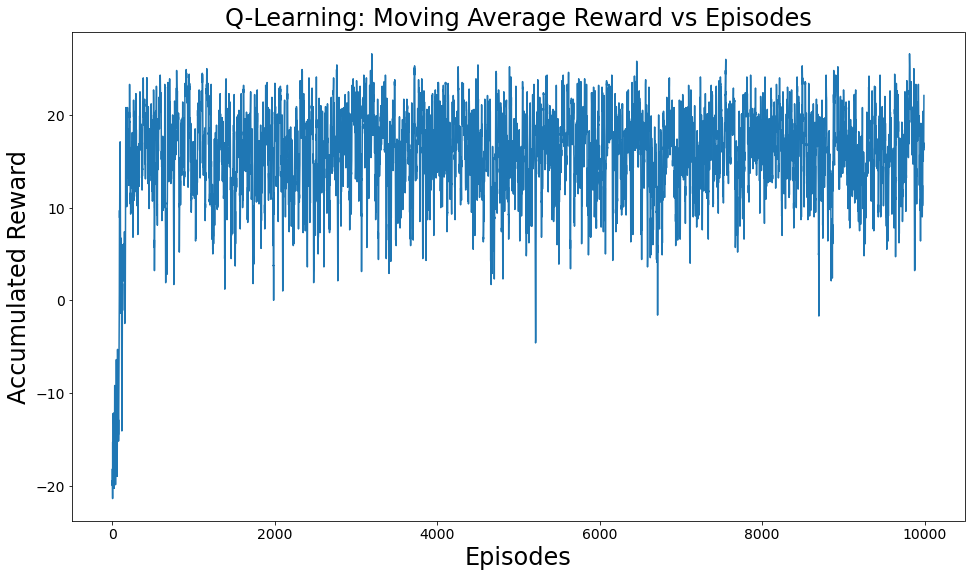

In [23]:
plt.figure(figsize=(16, 9))
plt.plot(moving_average(scores, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Episodes", fontsize=24)
plt.ylabel("Accumulated Reward", fontsize=24);
plt.title("Q-Learning: Moving Average Reward vs Episodes", fontsize=24);

## Q-Learning Cumulative Rewards vs. Discount Rates ($\gamma$)

In [139]:
# for gamma = 0.05
q_optimal_pi, scores_0_05, q_optimal_v = gridworld_mdp.q_learning(gamma=0.05, num_episodes=10000)
# for gamma = 0.25
q_optimal_pi, scores_0_25, q_optimal_v = gridworld_mdp.q_learning(gamma=0.25, num_episodes=10000)
# for gamma = 0.5
q_optimal_pi, scores_0_50, q_optimal_v = gridworld_mdp.q_learning(gamma=0.5, num_episodes=10000)
# for gamma = 0.75
q_optimal_pi, scores_0_75, q_optimal_v = gridworld_mdp.q_learning(gamma=0.75, num_episodes=10000)
# for gamma = 0.9
q_optimal_pi, scores_0_90, q_optimal_v = gridworld_mdp.q_learning(gamma=0.9, num_episodes=10000)

In [172]:
gamma_05 = pd.Series(moving_average(scores_0_05,100))
gamma_25 = pd.Series(moving_average(scores_0_25,100))
gamma_50 = pd.Series(moving_average(scores_0_50,100))
gamma_75 = pd.Series(moving_average(scores_0_75,100))
gamma_90 = pd.Series(moving_average(scores_0_90,100))

tmp=pd.concat([gamma_05,gamma_25,gamma_50,gamma_75,gamma_90], axis=1)

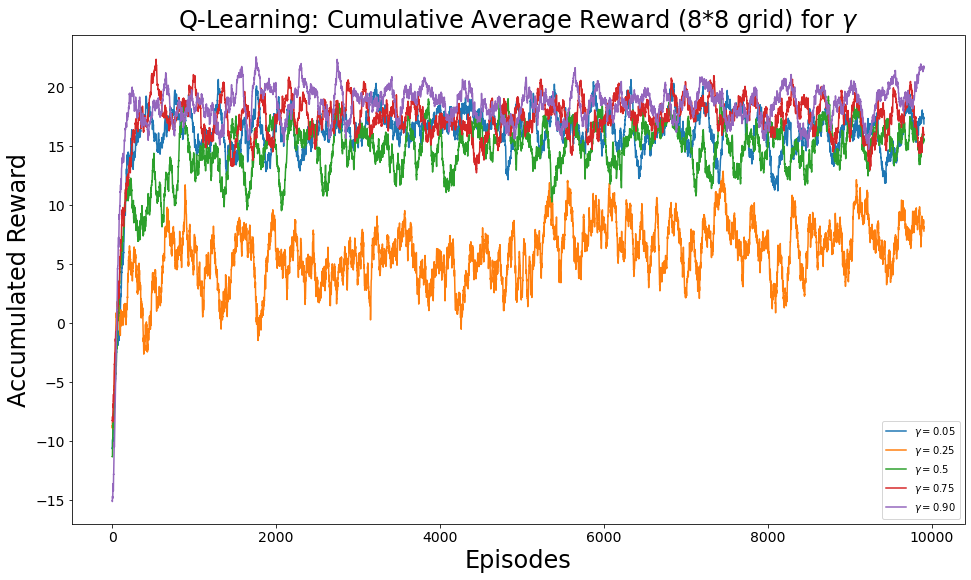

In [176]:
tmp = pd.DataFrame(tmp)
plt.figure(figsize=(16, 9))
plt.plot(tmp)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Episodes", fontsize=24)
plt.ylabel("Accumulated Reward", fontsize=24);
plt.legend(['$\gamma = 0.05$',
               '$\gamma = 0.25$',
               '$\gamma = 0.5$',
               '$\gamma = 0.75$',
               '$\gamma = 0.90$'], loc='best')
plt.title("Q-Learning: Cumulative Average Reward (8*8 grid) for $\gamma$", fontsize=24);

In [177]:
# for gamma = 0.05
q_optimal_pi, scores_0_05, q_optimal_v = gridworld2_mdp.q_learning(gamma=0.05, num_episodes=10000)
# for gamma = 0.25
q_optimal_pi, scores_0_25, q_optimal_v = gridworld2_mdp.q_learning(gamma=0.25, num_episodes=10000)
# for gamma = 0.5
q_optimal_pi, scores_0_50, q_optimal_v = gridworld2_mdp.q_learning(gamma=0.5, num_episodes=10000)
# for gamma = 0.75
q_optimal_pi, scores_0_75, q_optimal_v = gridworld2_mdp.q_learning(gamma=0.75, num_episodes=10000)
# for gamma = 0.9
q_optimal_pi, scores_0_90, q_optimal_v = gridworld2_mdp.q_learning(gamma=0.9, num_episodes=10000)

In [178]:
gamma_05 = pd.Series(moving_average(scores_0_05,100))
gamma_25 = pd.Series(moving_average(scores_0_25,100))
gamma_50 = pd.Series(moving_average(scores_0_50,100))
gamma_75 = pd.Series(moving_average(scores_0_75,100))
gamma_90 = pd.Series(moving_average(scores_0_90,100))

tmp=pd.concat([gamma_05,gamma_25,gamma_50,gamma_75,gamma_90], axis=1)

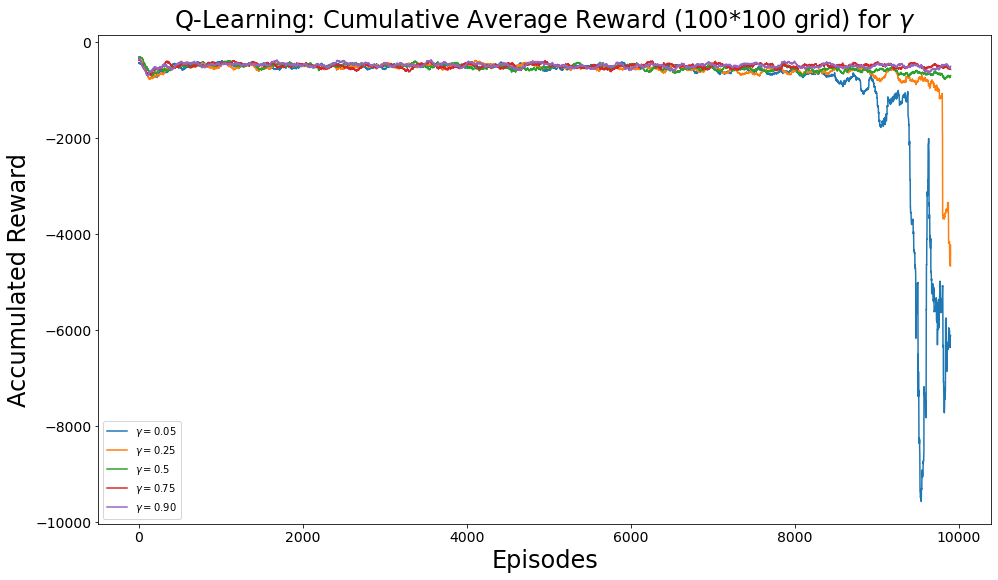

In [179]:
tmp = pd.DataFrame(tmp)
plt.figure(figsize=(16, 9))
plt.plot(tmp)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Episodes", fontsize=24)
plt.ylabel("Accumulated Reward", fontsize=24);
plt.legend(['$\gamma = 0.05$',
               '$\gamma = 0.25$',
               '$\gamma = 0.5$',
               '$\gamma = 0.75$',
               '$\gamma = 0.90$'], loc='best')
plt.title("Q-Learning: Cumulative Average Reward (100*100 grid) for $\gamma$", fontsize=24);

## Q-Learning Cumulative Rewards vs. Learning Rates ($\alpha$)

In [181]:
# for alpha = 0.05
q_optimal_pi, scores_0_05, q_optimal_v = gridworld_mdp.q_learning(learning_rate=0.05, num_episodes=10000)
# for alpha = 0.25
q_optimal_pi, scores_0_25, q_optimal_v = gridworld_mdp.q_learning(learning_rate=0.25, num_episodes=10000)
# for alpha = 0.5
q_optimal_pi, scores_0_50, q_optimal_v = gridworld_mdp.q_learning(learning_rate=0.5, num_episodes=10000)
# for alpha = 0.75
q_optimal_pi, scores_0_75, q_optimal_v = gridworld_mdp.q_learning(learning_rate=0.75, num_episodes=10000)
# for alpha = 1.0
q_optimal_pi, scores_0_1, q_optimal_v = gridworld_mdp.q_learning(learning_rate=1.0, num_episodes=10000)

In [182]:
alpha_05 = pd.Series(moving_average(scores_0_05,100))
alpha_25 = pd.Series(moving_average(scores_0_25,100))
alpha_50 = pd.Series(moving_average(scores_0_50,100))
alpha_75 = pd.Series(moving_average(scores_0_75,100))
alpha_1 = pd.Series(moving_average(scores_0_1,100))

tmp=pd.concat([alpha_05,alpha_25,alpha_50,alpha_75,alpha_1], axis=1)

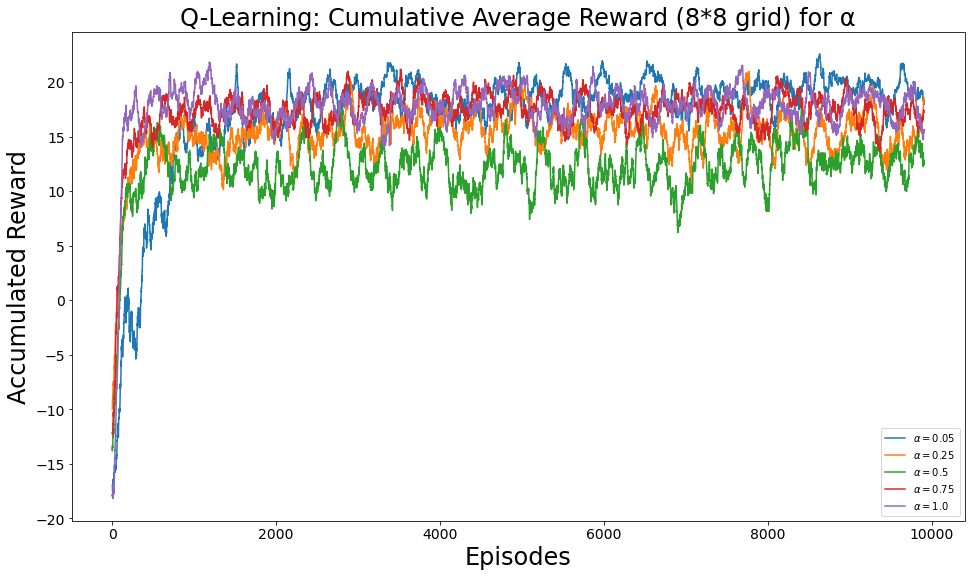

In [188]:
tmp = pd.DataFrame(tmp)
plt.figure(figsize=(16, 9))
plt.plot(tmp)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Episodes", fontsize=24)
plt.ylabel("Accumulated Reward", fontsize=24);
plt.legend(['$\u03B1 = 0.05$',
               '$\u03B1 = 0.25$',
               '$\u03B1 = 0.5$',
               '$\u03B1 = 0.75$',
               '$\u03B1 = 1.0$'], loc='best')
plt.title("Q-Learning: Cumulative Average Reward (8*8 grid) for \u03B1", fontsize=24);

## Q-Learning Cumulative Rewards vs. Epsilon

In [193]:
# for eps = 0.05
q_optimal_pi, scores_0_05, q_optimal_v = gridworld_mdp.q_learning(epsilon=0.05, num_episodes=10000)
# for eps = 0.25
q_optimal_pi, scores_0_25, q_optimal_v = gridworld_mdp.q_learning(epsilon=0.25, num_episodes=10000)
# for eps = 0.5
q_optimal_pi, scores_0_50, q_optimal_v = gridworld_mdp.q_learning(epsilon=0.5, num_episodes=10000)
# for eps = 0.75
q_optimal_pi, scores_0_75, q_optimal_v = gridworld_mdp.q_learning(epsilon=0.75, num_episodes=10000)
# for eps = 1.0
q_optimal_pi, scores_0_1, q_optimal_v = gridworld_mdp.q_learning(epsilon=1.0, num_episodes=10000)

In [194]:
eps_05 = pd.Series(moving_average(scores_0_05,100))
eps_25 = pd.Series(moving_average(scores_0_25,100))
eps_50 = pd.Series(moving_average(scores_0_50,100))
eps_75 = pd.Series(moving_average(scores_0_75,100))
eps_1 = pd.Series(moving_average(scores_0_1,100))

tmp=pd.concat([eps_05,eps_25,eps_50,eps_75,eps_1], axis=1)

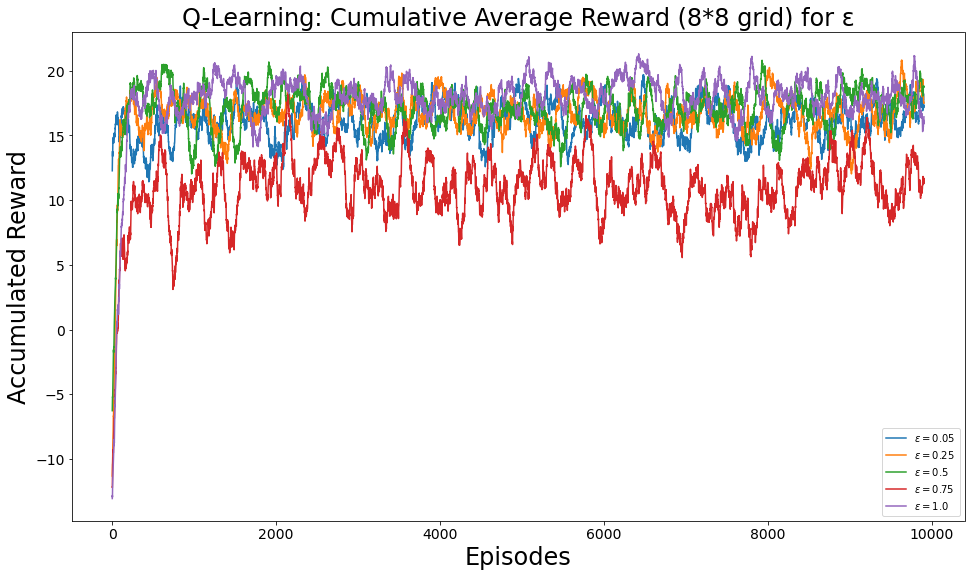

In [196]:
tmp = pd.DataFrame(tmp)
plt.figure(figsize=(16, 9))
plt.plot(tmp)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Episodes", fontsize=24)
plt.ylabel("Accumulated Reward", fontsize=24);
plt.legend(['$\u03B5 = 0.05$',
               '$\u03B5 = 0.25$',
               '$\u03B5 = 0.5$',
               '$\u03B5 = 0.75$',
               '$\u03B5 = 1.0$'], loc='best')
plt.title("Q-Learning: Cumulative Average Reward (8*8 grid) for \u03B5", fontsize=24);

# Optimal $V$

## Value Iteration

In [19]:
def parse_grid_dict(raw_dict, shape):
    matrix = np.zeros(shape)
    for k, v in raw_dict.items():
        matrix[k] = v
    return matrix

In [20]:
shape = (gambler_mdp.environment.rows, gambler_mdp.environment.columns)

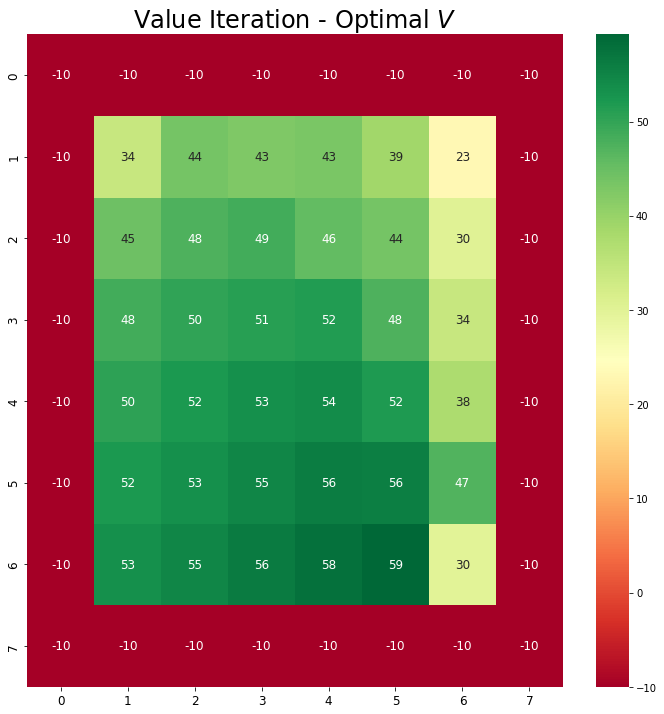

In [21]:
vi_v_matrix = parse_grid_dict(vi_optimal_v, shape)
plot_heatmap(vi_v_matrix, xlabel="", ylabel="", title="Value Iteration - Optimal $V$")

## Policy Iteration

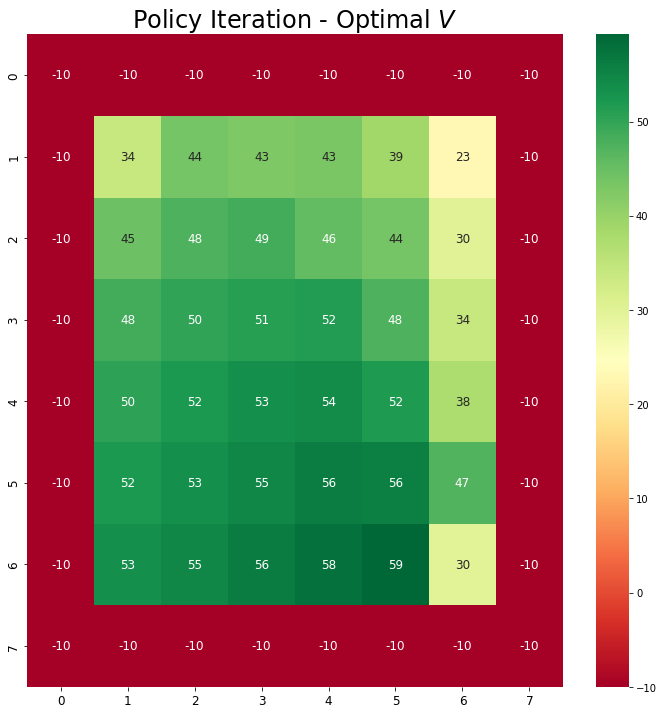

In [22]:
pi_v_matrix = parse_grid_dict(pi_optimal_v, shape)
plot_heatmap(pi_v_matrix, xlabel="", ylabel="", title="Policy Iteration - Optimal $V$")

## Q-Learning

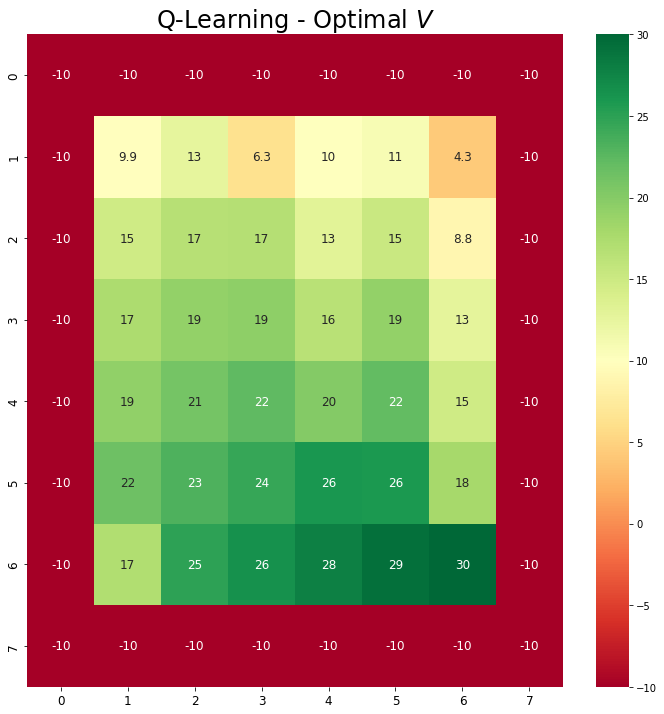

In [23]:
q_v_matrix = parse_grid_dict(q_optimal_v, shape)
plot_heatmap(q_v_matrix, xlabel="", ylabel="", title="Q-Learning - Optimal $V$")

# Optimal $\pi$

In [24]:
mapper = {0:"^", 1:">", 2:"v", 3:"<", 4: "-"}
def annotate_policy(pi_matrix):
    annot = np.empty_like(pi_matrix, dtype='<U10')
    for i in range(pi_matrix.shape[0]):
        for j in range(pi_matrix.shape[1]):
            annot[i, j] = mapper.get(pi_matrix[i, j])
    return annot

## Value Iteration

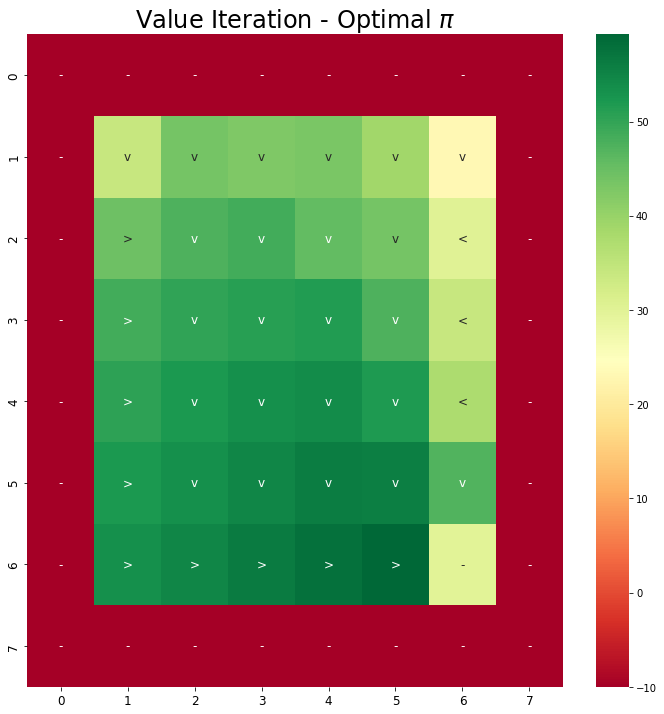

In [25]:
vi_pi_matrix = parse_grid_dict(vi_optimal_pi, shape)
plot_heatmap(vi_v_matrix, xlabel="", ylabel="", title="Value Iteration - Optimal $\pi$", annot=annotate_policy(vi_pi_matrix))

## Policy Iteration

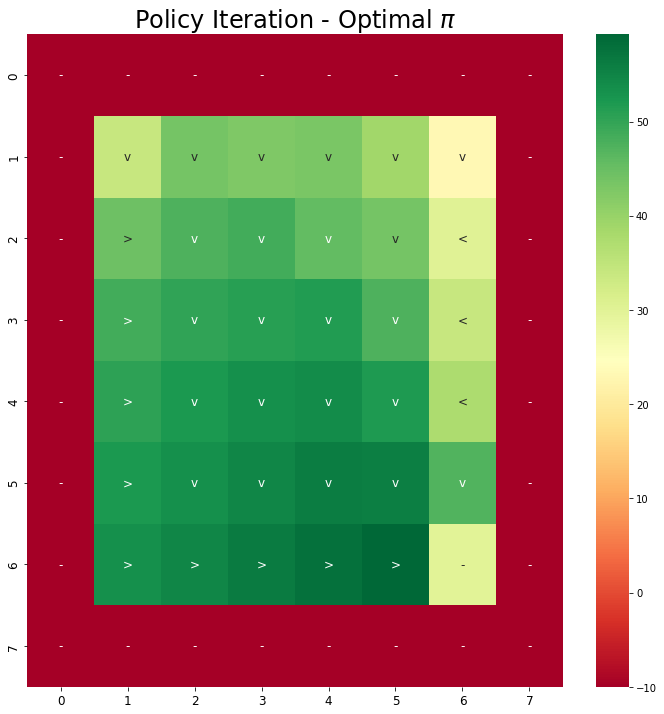

In [26]:
pi_pi_matrix = parse_grid_dict(pi_optimal_pi, shape)
plot_heatmap(pi_v_matrix, xlabel="", ylabel="", title="Policy Iteration - Optimal $\pi$", annot=annotate_policy(pi_pi_matrix))

## Q-Learning

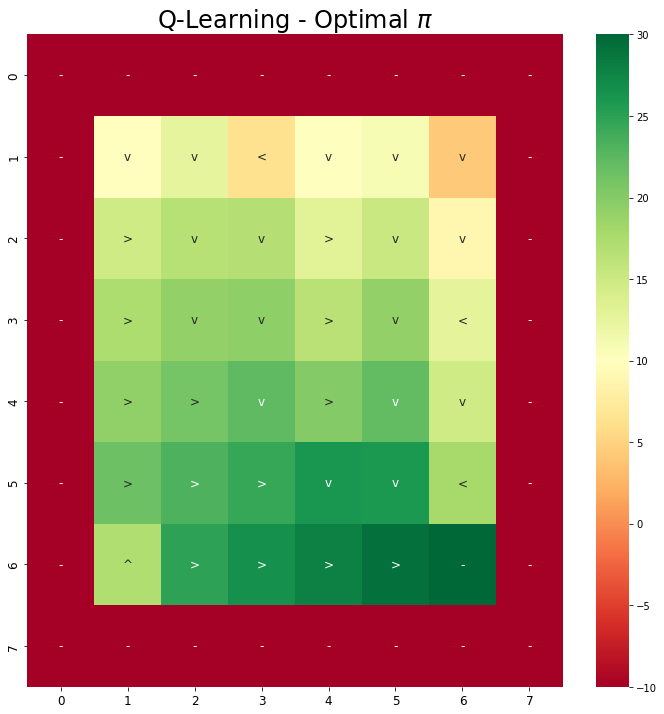

In [27]:
q_pi_matrix = parse_grid_dict(q_optimal_pi, shape)
plot_heatmap(q_v_matrix, xlabel="", ylabel="", title="Q-Learning - Optimal $\pi$", annot=annotate_policy(q_pi_matrix))